<a href="https://colab.research.google.com/github/Dmitriy-boytsev/Colab/blob/main/OlShe_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B020453_NetworkTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install pdf2image
!apt-get install poppler-utils

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import numpy as np
import time
import shutil
import re
from PIL import Image

import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from scipy import ndimage as nd

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import Callback


from urllib.parse import urlencode
from PIL import Image
from sklearn.utils import shuffle

In [ ]:
import os

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png'))[2]
print(len(fillles))


334


In [ ]:
import os

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/Pechat_png'))[2]
print(len(fillles))

333


#**Конвертировать PDF в png с печатью**

In [ ]:
import os

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/DATASET_pdf/+PECH/Pechat_pdf'))[2]
print(len(fillles))

637


In [ ]:
# Преобразовать pdf в png c печатью ============================================


import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

# Снятие лимита на пикели
Image.MAX_IMAGE_PIXELS = None

def barcode_uveren(pdf_folder, output_folder):
    # Создаем выходную папку, если она не существует
    os.makedirs(output_folder, exist_ok=True)

    # Получаем список всех PDF-файлов в папке
    pdf_files = [f for f in os.listdir(pdf_folder) if f.endswith('.pdf')]

    for index, pdf_file in enumerate(pdf_files, start=1):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        images = convert_from_path(pdf_path, dpi=300)  # Указываем 300 DPI

        # Получаем первое изображение
        img_cv = np.array(images[0])
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

        # Изменяем размер изображения на 192х270
        img_resized = cv2.resize(img_cv, (192, 270))

        # Формируем имя выходного файла
        output_file = os.path.join(output_folder, f'p{index}.png')

        # Сохраняем изображение
        cv2.imwrite(output_file, img_resized)

        # Отображение изображения (если нужно)
        #plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
        #plt.axis('off')  # Отключаем оси
        #plt.show()

# Пример вызова функции
barcode_uveren('/content/drive/MyDrive/NEIROSET_CNN/DATASET_pdf/+PECH/Pechat_pdf',
               '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/Pechat_png')

In [ ]:
import os

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/Pechat_png'))[2]
print(len(fillles))

519


In [ ]:
# Проверем размер каждого файла - соответствует ================================

import os
from PIL import Image

folder_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/Pechat_png'

for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            width, height = img.size
            print(f'Файл: {filename} | {width}x{height}')

Файл: p5.png | 192x270
Файл: p1.png | 192x270
Файл: p2.png | 192x270
Файл: p8.png | 192x270
Файл: p9.png | 192x270
Файл: p3.png | 192x270
Файл: p4.png | 192x270
Файл: p6.png | 192x270
Файл: p7.png | 192x270
Файл: p10.png | 192x270
Файл: p100.png | 192x270
Файл: p101.png | 192x270
Файл: p102.png | 192x270
Файл: p103.png | 192x270
Файл: p104.png | 192x270
Файл: p105.png | 192x270
Файл: p106.png | 192x270
Файл: p107.png | 192x270
Файл: p108.png | 192x270
Файл: p109.png | 192x270
Файл: p110.png | 192x270
Файл: p111.png | 192x270
Файл: p112.png | 192x270
Файл: p113.png | 192x270
Файл: p114.png | 192x270
Файл: p115.png | 192x270
Файл: p116.png | 192x270
Файл: p117.png | 192x270
Файл: p118.png | 192x270
Файл: p119.png | 192x270
Файл: p120.png | 192x270
Файл: p121.png | 192x270
Файл: p122.png | 192x270
Файл: p123.png | 192x270
Файл: p124.png | 192x270
Файл: p125.png | 192x270
Файл: p126.png | 192x270
Файл: p127.png | 192x270
Файл: p128.png | 192x270
Файл: p129.png | 192x270
Файл: p130.png | 19

In [ ]:
# Сконвертирвались не все, потому надо переименовать нормально сначала

import os

# Папка, в которой находятся файлы
folder_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/Pechat_png'

# Получаем список всех файлов в папке
files = os.listdir(folder_path)

# Начинаем с p1.png
start_index = 1

# Сортируем файлы, чтобы они были в порядке переименования
files.sort()

for i, filename in enumerate(files):
    # Пропускаем файлы, которые не являются изображениями
    if not filename.endswith('.png'):
        continue

    # Новый индекс для файла
    new_index = start_index + i

    # Новое имя файла
    new_filename = f'p{new_index}.png'

    # Полные пути к старому и новому файлам
    old_file_path = os.path.join(folder_path, filename)
    new_file_path = os.path.join(folder_path, new_filename)

    # Переименовываем файл
    os.rename(old_file_path, new_file_path)

print("Переименование завершено.")

Переименование завершено.


#**Конвертировать PDF в png без печати**


In [ ]:
import os

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/DATASET_pdf/+NOPECH/NoPechat_pdf'))[2]
print(len(fillles))

305


In [ ]:
# Преобразовать pdf в png без печати ===========================================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

# Снятие лимита на пикели
Image.MAX_IMAGE_PIXELS = None

def barcode_uveren(pdf_folder, output_folder):
    # Создаем выходную папку, если она не существует
    os.makedirs(output_folder, exist_ok=True)

    # Получаем список всех PDF-файлов в папке
    pdf_files = [f for f in os.listdir(pdf_folder) if f.endswith('.pdf')]

    for index, pdf_file in enumerate(pdf_files, start=1):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        images = convert_from_path(pdf_path, dpi=300)  # Указываем 300 DPI

        # Получаем первое изображение
        img_cv = np.array(images[0])
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

        # Изменяем размер изображения на 192х270
        img_resized = cv2.resize(img_cv, (192, 270))

        # Формируем имя выходного файла
        output_file = os.path.join(output_folder, f'p{index}.png')

        # Сохраняем изображение
        cv2.imwrite(output_file, img_resized)

        # Отображение изображения (если нужно)
        #plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
        #plt.axis('off')  # Отключаем оси
        #plt.show()

# Пример вызова функции
barcode_uveren('/content/drive/MyDrive/NEIROSET_CNN/DATASET_pdf/+NOPECH/NoPechat_pdf',
               '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png')

In [ ]:
import os

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png'))[2]
print(len(fillles))

296


In [ ]:
# Уменьшаем png от Алексея =====================================================

import os
from PIL import Image

# Define the source and target directories
source_dir = '/content/drive/MyDrive/NEIROSET_CNN/DATASET_pdf/+NOPECH/png_384x540'
target_dir = '/content/drive/MyDrive/NEIROSET_CNN/DATASET_pdf/+NOPECH/png_192x270'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Loop through all files in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith('.png'):
        # Open an image file
        with Image.open(os.path.join(source_dir, filename)) as img:
            # Resize the image
            img_resized = img.resize((192, 270))
            # Save the resized image to the target directory
            img_resized.save(os.path.join(target_dir, filename))

print("Resizing complete!")

Resizing complete!


In [ ]:
import os

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/DATASET_pdf/+NOPECH/png_192x270'))[2]
print(len(fillles))

326


In [ ]:
# Проверем размер каждого файла - соответствует ================================

import os
from PIL import Image

folder_path = '/content/drive/MyDrive/NEIROSET_CNN/DATASET_pdf/+NOPECH/png_192x270'

for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            width, height = img.size
            print(f'Файл: {filename} | {width}x{height}')

Файл: Image00078.png | 192x270
Файл: Image00059.png | 192x270
Файл: Image00082.png | 192x270
Файл: Image00063.png | 192x270
Файл: Image00083.png | 192x270
Файл: Image00080.png | 192x270
Файл: Image00084.png | 192x270
Файл: Image00054.png | 192x270
Файл: Image00056.png | 192x270
Файл: Image00057.png | 192x270
Файл: Image00079.png | 192x270
Файл: Image00085.png | 192x270
Файл: Image00058.png | 192x270
Файл: Image00061.png | 192x270
Файл: Image00060.png | 192x270
Файл: Image00055.png | 192x270
Файл: Image00081.png | 192x270
Файл: Image00062.png | 192x270
Файл: Image00209.png | 192x270
Файл: Image00154.png | 192x270
Файл: Image00268.png | 192x270
Файл: Image00161.png | 192x270
Файл: Image00294.png | 192x270
Файл: Image00183.png | 192x270
Файл: Image00242.png | 192x270
Файл: Image00235.png | 192x270
Файл: Image00189.png | 192x270
Файл: Image00266.png | 192x270
Файл: Image00215.png | 192x270
Файл: Image00123.png | 192x270
Файл: Image00203.png | 192x270
Файл: Image00153.png | 192x270
Файл: Im

In [ ]:
# Копируем файлы из png_192x270 в NoPechat_png

import os
import shutil

# Define the source and target directories
source_dir = '/content/drive/MyDrive/NEIROSET_CNN/DATASET_pdf/+NOPECH/png_192x270'
target_dir = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Loop through all files in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith('.png'):
        # Construct full file path
        source_file = os.path.join(source_dir, filename)
        target_file = os.path.join(target_dir, filename)

        # Copy the file
        shutil.copy(source_file, target_file)

print("Копирование завершено!")

Копирование завершено!


In [ ]:
import os

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png'))[2]
print(len(fillles))

622


In [ ]:
# Теперь переименовываем все по порядку в NoPechat_png =========================

import os

folder_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png'
files = os.listdir(folder_path)

# Начинаем с np259.png
start_index = 1

# Сортируем файлы, чтобы они были в порядке переименования
files.sort()

for i, filename in enumerate(files):
    # Пропускаем файлы, которые не являются изображениями
    if not filename.endswith('.png'):
        continue

    # Новый индекс для файла
    new_index = start_index + i

    # Новое имя файла
    new_filename = f'np{new_index}.png'

    # Полные пути к старому и новому файлам
    old_file_path = os.path.join(folder_path, filename)
    new_file_path = os.path.join(folder_path, new_filename)

    # Переименовываем файл
    os.rename(old_file_path, new_file_path)

print("Переименование завершено.")

Переименование завершено.


In [ ]:
import os

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png'))[2]
print(len(fillles))

622


In [ ]:
# Проверем размер каждого файла - соответствует ================================

import os
from PIL import Image

folder_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png'

for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            width, height = img.size
            print(f'Файл: {filename} | {width}x{height}')

Файл: np327.png | 192x270
Файл: np438.png | 192x270
Файл: np546.png | 192x270
Файл: np557.png | 192x270
Файл: np568.png | 192x270
Файл: np579.png | 192x270
Файл: np590.png | 192x270
Файл: np601.png | 192x270
Файл: np612.png | 192x270
Файл: np328.png | 192x270
Файл: np339.png | 192x270
Файл: np350.png | 192x270
Файл: np361.png | 192x270
Файл: np372.png | 192x270
Файл: np383.png | 192x270
Файл: np394.png | 192x270
Файл: np405.png | 192x270
Файл: np416.png | 192x270
Файл: np427.png | 192x270
Файл: np439.png | 192x270
Файл: np450.png | 192x270
Файл: np461.png | 192x270
Файл: np472.png | 192x270
Файл: np483.png | 192x270
Файл: np494.png | 192x270
Файл: np505.png | 192x270
Файл: np516.png | 192x270
Файл: np527.png | 192x270
Файл: np538.png | 192x270
Файл: np547.png | 192x270
Файл: np548.png | 192x270
Файл: np549.png | 192x270
Файл: np550.png | 192x270
Файл: np551.png | 192x270
Файл: np552.png | 192x270
Файл: np553.png | 192x270
Файл: np554.png | 192x270
Файл: np555.png | 192x270
Файл: np556.

#**Делаю выборки**

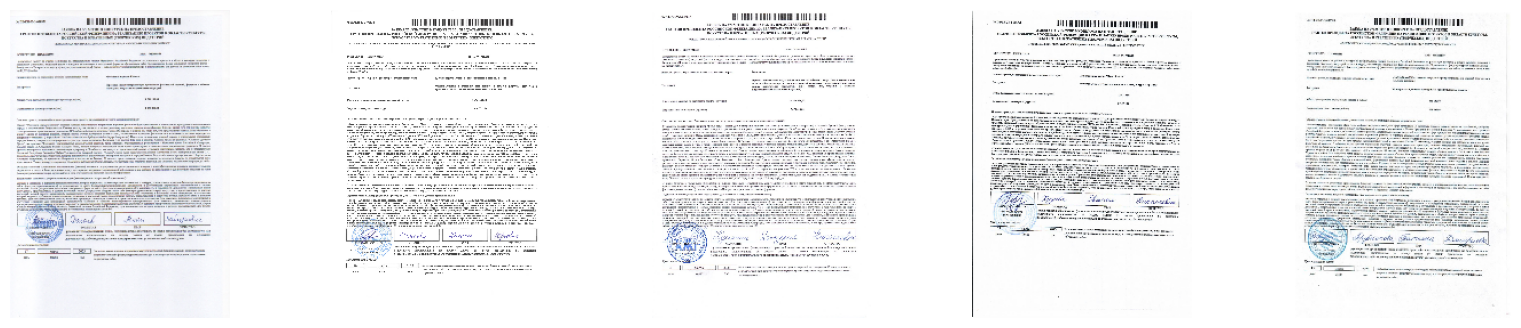

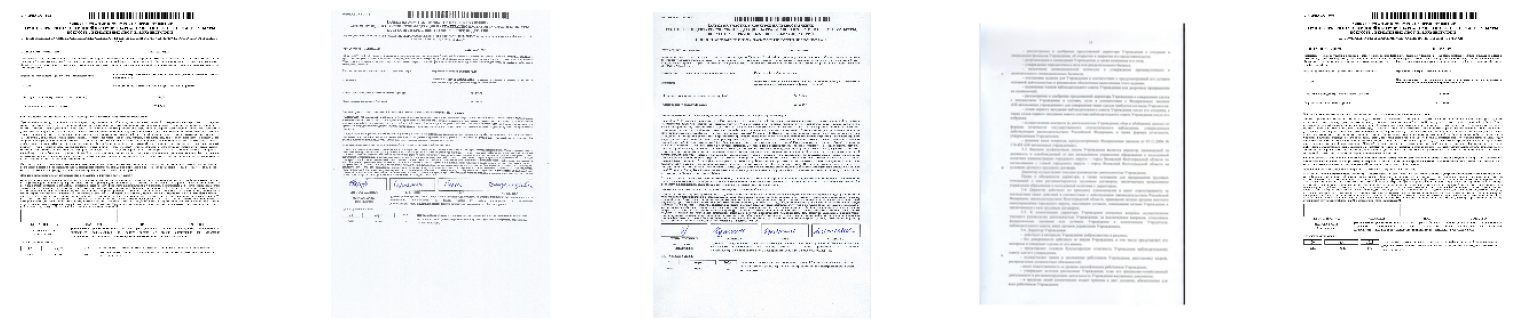

In [ ]:
# Выведем по 5 случайных фото ==================================================

import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Функция для отображения изображений
def display_images(image_paths):
    images = []
    for filepath in image_paths:
        image = Image.open(filepath)
        images.append(image)

    num_images = len(images)

    # Определяем размеры для отображения
    fig, axs = plt.subplots(1, num_images, figsize=(num_images * 4, 4))  # Увеличиваем размер фигуры
    for i in range(num_images):
        img = images[i]
        axs[i].imshow(img)
        axs[i].axis('off')  # Скрываем оси для лучшего визуального восприятия

# Директория для первого набора изображений
directory1 = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/Pechat_png'
png_files1 = [os.path.join(directory1, file) for file in os.listdir(directory1) if file.endswith('.png')]
random_files1 = random.sample(png_files1, 5)

display_images(random_files1)

# Директория для второго набора изображений
directory2 = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png'
png_files2 = [os.path.join(directory2, file) for file in os.listdir(directory2) if file.endswith('.png')]
random_files2 = random.sample(png_files2, 5)

display_images(random_files2)

plt.show()

In [ ]:
import os

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_train'))[2]
print(len(fillles))

859


In [ ]:
# выделяем тестовую выборку рандомно
# ==============================================================================

import os
import shutil
import random


def split_test_data(data_dir, output_dir, test_ratio=0.1):
    # Создаем папку TESTS и подпапку Test_original
    test_dir = os.path.join(output_dir, 'TESTS', 'Test_original')
    os.makedirs(test_dir, exist_ok=True)

    # Проходим по всем папкам в исходной директории
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            # Создаем соответствующую папку в Test_original
            test_folder_path = os.path.join(test_dir, folder)
            os.makedirs(test_folder_path, exist_ok=True)

            # Получаем список файлов и выбираем тестовые файлы
            files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            test_files = random.sample(files, int(len(files) * test_ratio))

            # Перемещаем тестовые файлы в новую папку
            for file in test_files:
                shutil.move(os.path.join(folder_path, file), test_folder_path)

# Определяем пути к исходной и целевой директориям
data_dir = "/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA"
output_dir = "/content/drive/MyDrive/NEIROSET_CNN/270x192/TEST"

# Выделяем тестовую выборку для всех папок сразу
split_test_data(data_dir, output_dir)

In [ ]:
# выведем инфо об обновленной папке train ===================================================

import os
from PIL import Image

def analyze_folders(main_folder_path):
    # Проверка существования папки
    if not os.path.exists(main_folder_path):
        print("Указанная папка не существует.")
        return

    folder_count = 0
    folder_info = {}
    all_images = []
    total_photos = 0  # Переменная для хранения общего количества фотографий

    # Обход всех папок в указанной директории
    for root, dirs, files in os.walk(main_folder_path):
        for dir_name in dirs:
            folder_count += 1
            folder_path = os.path.join(root, dir_name)
            file_count = 0
            formats = {}

            # Обход файлов в текущей папке
            for file in os.listdir(folder_path):
                if os.path.isfile(os.path.join(folder_path, file)):
                    file_count += 1
                    ext = file.split('.')[-1].lower()
                    formats[ext] = formats.get(ext, 0) + 1

                    # Сохраняем изображения для анализа разрешения
                    if ext in ['jpg', 'jpeg', 'png', 'gif']:
                        image_path = os.path.join(folder_path, file)
                        total_photos += 1  # Увеличиваем общий счетчик фотографий
                        try:
                            with Image.open(image_path) as img:
                                all_images.append(img.size)  # Сохраняем размер изображения
                        except Exception as e:
                            print(f"Ошибка при открытии изображения {image_path}: {e}")

            folder_info[dir_name] = {
                'file_count': file_count,
                'formats': formats
            }

    # Вывод информации о папках
    print(f"Количество папок: {folder_count}")
    for folder_name, info in folder_info.items():
        print(f"Папка: {folder_name}, Количество файлов: {info['file_count']}")

    # Вывод общего количества фотографий
    print(f"Общее количество фотографий: {total_photos}")

    # Определение минимального и максимального разрешения изображений
    if all_images:
        min_resolution = min(all_images, key=lambda x: x[0]*x[1])
        max_resolution = max(all_images, key=lambda x: x[0]*x[1])
        print(f"Минимальное разрешение: {min_resolution}")
        print(f"Максимальное разрешение: {max_resolution}")
    else:
        print("Изображения не найдены.")

analyze_folders('/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA')

Количество папок: 2
Папка: Pechat_png, Количество файлов: 375
Папка: NoPechat_png, Количество файлов: 376
Общее количество фотографий: 751
Минимальное разрешение: (192, 270)
Максимальное разрешение: (192, 270)


In [ ]:
# выведем инфо о папке test ====================================================

import os
from PIL import Image

def analyze_folders(main_folder_path):
    # Проверка существования папки
    if not os.path.exists(main_folder_path):
        print("Указанная папка не существует.")
        return

    folder_count = 0
    folder_info = {}
    all_images = []
    total_photos = 0  # Переменная для хранения общего количества фотографий

    # Обход всех папок в указанной директории
    for root, dirs, files in os.walk(main_folder_path):
        for dir_name in dirs:
            folder_count += 1
            folder_path = os.path.join(root, dir_name)
            file_count = 0
            formats = {}

            # Обход файлов в текущей папке
            for file in os.listdir(folder_path):
                if os.path.isfile(os.path.join(folder_path, file)):
                    file_count += 1
                    ext = file.split('.')[-1].lower()
                    formats[ext] = formats.get(ext, 0) + 1

                    # Сохраняем изображения для анализа разрешения
                    if ext in ['jpg', 'jpeg', 'png', 'gif']:
                        image_path = os.path.join(folder_path, file)
                        total_photos += 1  # Увеличиваем общий счетчик фотографий
                        try:
                            with Image.open(image_path) as img:
                                all_images.append(img.size)  # Сохраняем размер изображения
                        except Exception as e:
                            print(f"Ошибка при открытии изображения {image_path}: {e}")

            folder_info[dir_name] = {
                'file_count': file_count,
                'formats': formats
            }

    # Вывод информации о папках
    print(f"Количество папок: {folder_count}")
    for folder_name, info in folder_info.items():
        print(f"Папка: {folder_name}, Количество файлов: {info['file_count']}")

    # Вывод общего количества фотографий
    print(f"Общее количество фотографий: {total_photos}")

    # Определение минимального и максимального разрешения изображений
    if all_images:
        min_resolution = min(all_images, key=lambda x: x[0]*x[1])
        max_resolution = max(all_images, key=lambda x: x[0]*x[1])
        print(f"Минимальное разрешение: {min_resolution}")
        print(f"Максимальное разрешение: {max_resolution}")
    else:
        print("Изображения не найдены.")

analyze_folders('/content/drive/MyDrive/NEIROSET_CNN/270x192/TEST')

Количество папок: 2
Папка: Pechat_png, Количество файлов: 41
Папка: NoPechat_png, Количество файлов: 41
Общее количество фотографий: 82
Минимальное разрешение: (192, 270)
Максимальное разрешение: (192, 270)


In [ ]:
# Проверяем train и test, все ли фото продолжают быть 192x270
# ==============================================================================

'''
import os
from PIL import Image
'''

# Путь к датасету
dataset_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA'

# Функция для вывода размеров изображений
def print_image_sizes(dataset_path):
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        print(f"Папка: {class_name}")
        sizes = set()
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            image = Image.open(img_path)
            sizes.add(image.size)
        print(f"Размеры изображений: {sizes}")

# Вызов функции для вывода размеров изображений
print_image_sizes(dataset_path)

Папка: Pechat_png
Размеры изображений: {(192, 270)}
Папка: NoPechat_png
Размеры изображений: {(192, 270)}


In [ ]:
dataset_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/TEST'
print_image_sizes(dataset_path)

Папка: Pechat_png
Размеры изображений: {(192, 270)}
Папка: NoPechat_png
Размеры изображений: {(192, 270)}


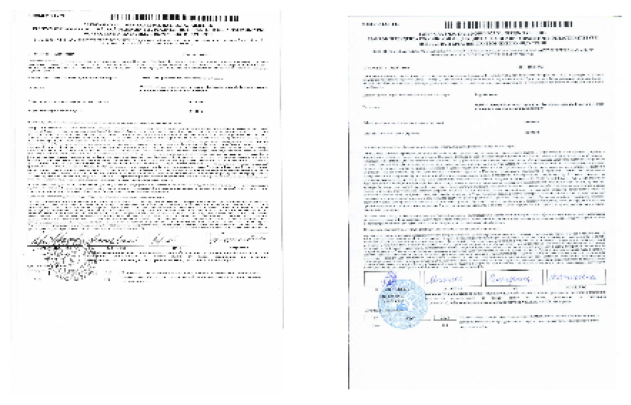

In [ ]:
# Проверяю ориентацию фото =====================================================

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_test/image_1.jpg'
img2 = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_train/image_1.jpg'

images = [img1, img2]

def plot_row(images):
    fig, axs = plt.subplots(1, len(images), figsize=(8,5))
    for i, image in enumerate(images):
        img = mpimg.imread(image)
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
    plt.show()

plot_row(images)


#**Формирую метки для train и test**

ДЛЯ CNN

In [ ]:
# Делаем метки для train и проверяем, соответстует ли количество меток количеству фото
# ==============================================================================

import os
import pandas as pd


dataset_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA'

# Получение списка классов
classes = os.listdir(dataset_path)

# Создание списка с относительными путями к изображениям и их метками
data = []
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        # Создаем относительный путь
        relative_path = os.path.join(class_name, filename)
        label = classes.index(class_name)
        data.append({'image_path': relative_path, 'label': label})

# Создание DataFrame
df = pd.DataFrame(data)

# Сохранение DataFrame в CSV файл
df.to_csv('/content/drive/MyDrive/NEIROSET_CNN/270x192/LABEL/train_labels.csv', index=False)

print(f'Количество классов: {len(classes)}')

# Подсчет общего количества файлов
total_files = sum(len(files) for _, _, files in os.walk(dataset_path))

print(f'Общее количество файлов в датасете: {total_files}')
print(f'Количество меток в файле image_labels.csv: {len(df)}')

if total_files == len(df):
    print("Количество меток соответствует количеству файлов в датасете.")
else:
    print("ВНИМАНИЕ: Количество меток не соответствует количеству файлов в датасете!")

Количество классов: 2
Общее количество файлов в датасете: 751
Количество меток в файле image_labels.csv: 751
Количество меток соответствует количеству файлов в датасете.


In [ ]:
# Делаем метки для test и проверяем, соответстует ли количество меток количеству фото
# ==============================================================================

'''
import os
import pandas as pd
'''

dataset_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/TEST'

# Получение списка классов
classes = os.listdir(dataset_path)

# Создание списка с относительными путями к изображениям и их метками
data = []
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        # Создаем относительный путь
        relative_path = os.path.join(class_name, filename)
        label = classes.index(class_name)
        data.append({'image_path': relative_path, 'label': label})

# Создание DataFrame
df = pd.DataFrame(data)

# Сохранение DataFrame в CSV файл
df.to_csv('/content/drive/MyDrive/NEIROSET_CNN/270x192/LABEL/test_labels.csv', index=False)

print(f'Количество классов: {len(classes)}')

# Подсчет общего количества файлов
total_files = sum(len(files) for _, _, files in os.walk(dataset_path))

print(f'Общее количество файлов в датасете: {total_files}')
print(f'Количество меток в файле image_labels.csv: {len(df)}')

if total_files == len(df):
    print("Количество меток соответствует количеству файлов в датасете.")
else:
    print("ВНИМАНИЕ: Количество меток не соответствует количеству файлов в датасете!")

Количество классов: 2
Общее количество файлов в датасете: 82
Количество меток в файле image_labels.csv: 82
Количество меток соответствует количеству файлов в датасете.


In [ ]:
# Сливаем папки двух классов в одну x_train ====================================

import os
import shutil
import random

# Путь к папкам с изображениями
folder1 = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png'
folder2 = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/Pechat_png'
output_folder = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_train'

# Создаем выходную папку, если она не существует
os.makedirs(output_folder, exist_ok=True)

# Копируем изображения из первой папки
for filename in os.listdir(folder1):
    shutil.copy(os.path.join(folder1, filename), output_folder)

# Копируем изображения из второй папки
for filename in os.listdir(folder2):
    shutil.copy(os.path.join(folder2, filename), output_folder)

# Перемешиваем файлы в выходной папке
files = os.listdir(output_folder)
random.shuffle(files)

# Перезаписываем перемешанные файлы обратно в выходную папку
for i, filename in enumerate(files):
    shutil.move(os.path.join(output_folder, filename), os.path.join(output_folder, f'image_{i}.jpg'))

In [ ]:
# Сколько всего есть файлов с печатями

fillles = next(os.walk('/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_train'))[2]
print(f'Количество - {len(fillles)}')

Количество - 751


In [ ]:
# Сливаем папки двух классов в одну x_train ====================================

import os
import shutil
import random

# Путь к папкам с изображениями
folder1 = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/NoPechat_png'
folder2 = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATA/Pechat_png'
output_folder = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_train'

# Создаем выходную папку, если она не существует
os.makedirs(output_folder, exist_ok=True)

# Копируем изображения из первой папки
for filename in os.listdir(folder1):
    shutil.copy(os.path.join(folder1, filename), output_folder)

# Копируем изображения из второй папки
for filename in os.listdir(folder2):
    shutil.copy(os.path.join(folder2, filename), output_folder)

# Перемешиваем файлы в выходной папке
files = os.listdir(output_folder)
random.shuffle(files)

# Перезаписываем перемешанные файлы обратно в выходную папку
for i, filename in enumerate(files):
    shutil.move(os.path.join(output_folder, filename), os.path.join(output_folder, f'image_{i}.jpg'))

In [ ]:
# Сливаем папки двух классов в одну x_test =====================================

import os
import shutil
import random

# Путь к папкам с изображениями
folder1 = '/content/drive/MyDrive/NEIROSET_CNN/270x192/TEST/NoPechat_png'
folder2 = '/content/drive/MyDrive/NEIROSET_CNN/270x192/TEST/Pechat_png'
output_folder = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_test'

# Создаем выходную папку, если она не существует
os.makedirs(output_folder, exist_ok=True)

# Копируем изображения из первой папки
for filename in os.listdir(folder1):
    shutil.copy(os.path.join(folder1, filename), output_folder)

# Копируем изображения из второй папки
for filename in os.listdir(folder2):
    shutil.copy(os.path.join(folder2, filename), output_folder)

# Перемешиваем файлы в выходной папке
files = os.listdir(output_folder)
random.shuffle(files)

# Перезаписываем перемешанные файлы обратно в выходную папку
for i, filename in enumerate(files):
    shutil.move(os.path.join(output_folder, filename), os.path.join(output_folder, f'image_{i}.jpg'))

**Подгружаем выборки и метки**

In [ ]:
# загружаем train и test ====================================

import cv2
import numpy as np
import os

# Пути к папкам с изображениями
train_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_train'
test_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_test'

# Загрузка изображений для обучающей выборки
x_train = []
for img_name in os.listdir(train_path):
    img = cv2.imread(os.path.join(train_path, img_name))
    x_train.append(img)

# Загрузка изображений для тестовой выборки
x_test = []
for img_name in os.listdir(test_path):
    img = cv2.imread(os.path.join(test_path, img_name))
    x_test.append(img)

# Преобразование в numpy массивы
x_train = np.array(x_train)
x_test = np.array(x_test)

# Нормализация (приведение значений пикселей к диапазону [0,1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# загружаем train с 1 каналом ==================================================

import cv2
import numpy as np
import os

# Пути к папкам с изображениями
train_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_train'
test_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png/x_test'

# Загрузка изображений для обучающей выборки в оттенках серого
x_train = []
for img_name in os.listdir(train_path):
    img = cv2.imread(os.path.join(train_path, img_name), cv2.IMREAD_GRAYSCALE) # Загрузка в оттенках серого
    x_train.append(img)

# Загрузка изображений для тестовой выборки в оттенках серого
x_test = []
for img_name in os.listdir(test_path):
    img = cv2.imread(os.path.join(test_path, img_name), cv2.IMREAD_GRAYSCALE) # Загрузка в оттенках серого
    x_test.append(img)

# Преобразование в numpy массивы
x_train = np.array(x_train)
x_test = np.array(x_test)

# Нормализация (приведение значений пикселей к диапазону [0,1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# загружаем метки ===============================================================

import pandas as pd
import numpy as np

# Пути к вашим CSV-файлам с метками
train_labels_csv = "/content/drive/MyDrive/NEIROSET_CNN/270x192/LABEL/train_labels.csv"
test_labels_csv = "/content/drive/MyDrive/NEIROSET_CNN/270x192/LABEL/test_labels.csv"


def load_labels(csv_path):
    """Загружает метки из CSV-файла."""
    try:
        data = pd.read_csv(csv_path)
        labels = data['label'].values
        return np.array(labels)
    except FileNotFoundError:
        print(f"Ошибка: Файл {csv_path} не найден.")
        return None
    except KeyError:
        print(f"Ошибка: Столбец 'label' не найден в файле {csv_path}.")
        return None


# Загрузка меток для обучающей и тестовой выборок
y_train = load_labels(train_labels_csv)
y_test = load_labels(test_labels_csv)

# Проверка, что метки успешно загружены
if y_train is not None and y_test is not None:
    print("Метки для обучающей выборки:")
    print(y_train.shape)
    print(y_train)
    print("\nМетки для тестовой выборки:")
    print(y_test.shape)
    print(y_test)

Метки для обучающей выборки:
(751,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
# Вывод размерностей
print("Размерность x_train:", x_train.shape)
print("Размерность x_test:", x_test.shape)
print("Размерность y_train:", y_train.shape)
print("Размерность y_test:", y_test.shape)

Размерность x_train: (751, 270, 192)
Размерность x_test: (82, 270, 192)
Размерность y_train: (751,)
Размерность y_test: (82,)


#**Подгружаю выборки в генератор**

In [ ]:

train_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/DATASET_png' # Папка с папками картинок, рассортированных по категориям
batch_size = 12  # Размер выборки
img_width = 192  # Ширина изображения
img_height = 270 # Высота изображения

In [ ]:
# Создание генератора с необходимой аугментацией
datagen = ImageDataGenerator(
    rescale=1. / 255,               # Нормализация пикселей
    rotation_range=1,               # Поворот вправо и влево на 1 градус
    horizontal_flip=True,           # Горизонтальный флип
    validation_split=0.2            # Разделение на обучающую и валидационную выборки (20% для валидации)
)

# Создание генератора для обучающей выборки
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',                    # Используйте 'categorical' для многоклассовой классификации
    shuffle=True,                           # Перемешивание данных
    subset='training'                       # Обучающая выборка
)

# Создание генератора для валидационной выборки
validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='validation'                   # Валидационная выборка
)

Found 667 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


**Первый запуск**

In [ ]:

model = Sequential([
    Input(shape=(img_height, img_width, 3)),  # Обратите внимание на порядок: (height, width, channels)
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.35),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Dropout(0.3),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.3),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(1024, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.3),

    Flatten(),
    Dense(2048, activation='elu'),
    Dense(4096, activation='elu'),
    Dense(1, activation='sigmoid')  # Один выходной нейрон для бинарной классификации
])

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Вывод архитектуры модели
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 270, 192, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 270, 192, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 90, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 90, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 90, 64, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 90, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 21, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 30, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 30, 21, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 30, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 10, 7, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 10, 7, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 10, 7, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 10, 7, 1024)         │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 2, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 3, 2, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6144)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2048)                │      12,584,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,918,017 (140.83 MB)

 Trainable params: 36,918,017 (140.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stop])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8759 - loss: 0.4369 - val_accuracy: 0.8974 - val_loss: 0.4798
Epoch 2/10
 1/55 ━━━━━━━━━━━━━━━━━━━━ 32s 599ms/step - accuracy: 0.9167 - loss: 0.2981

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


55/55 ━━━━━━━━━━━━━━━━━━━━ 16s 286ms/step - accuracy: 0.9167 - loss: 0.2981 - val_accuracy: 1.0000 - val_loss: 0.4263
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 71s 633ms/step - accuracy: 0.9105 - loss: 0.3330 - val_accuracy: 0.9038 - val_loss: 0.4262
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8333 - loss: 0.4423 - val_accuracy: 0.9000 - val_loss: 0.4121
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 611ms/step - accuracy: 0.8888 - loss: 0.3799 - val_accuracy: 0.9103 - val_loss: 0.3288
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 1.0000 - loss: 0.0914 - val_accuracy: 0.8000 - val_loss: 0.5061
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 615ms/step - accuracy: 0.8996 - loss: 0.3331 - val_accuracy: 0.9038 - val_loss: 0.3240
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9167 - loss: 0.2733 - val_accuracy: 0.9000 - val_loss: 0.3345
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 35s 609ms/step - accuracy: 0.9147 - loss: 0.2954 - val_accuracy: 0.8974 - val_

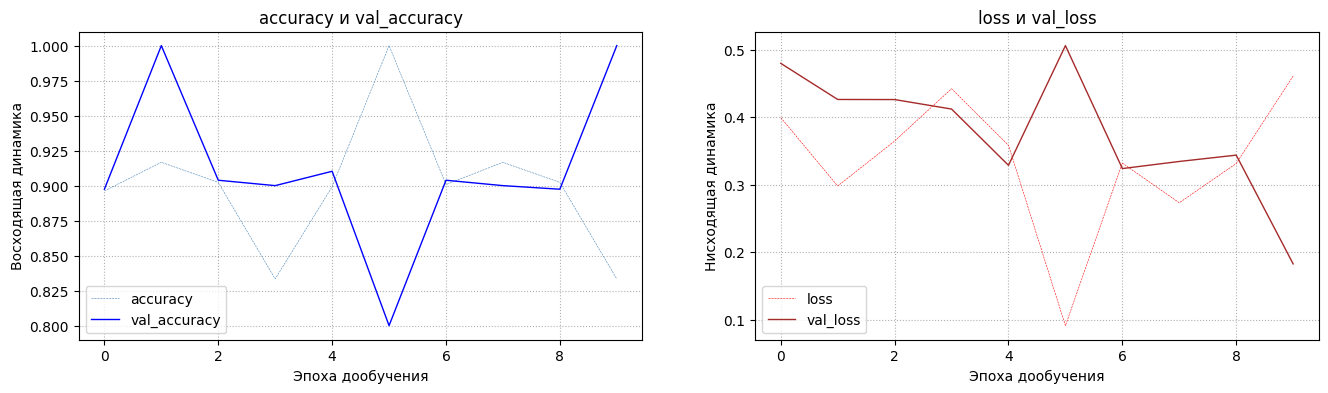

In [ ]:
import matplotlib.pyplot as plt

# Создаем фигуру с двумя наборами осей, расположенными в ряд
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Первый график: accuracy и val_accuracy
ax[0].plot(history.history['accuracy'], '--', color='steelblue', label='accuracy', linewidth=0.4)
ax[0].plot(history.history['val_accuracy'], color='blue', label='val_accuracy', linewidth=1)
ax[0].set_xlabel('Эпоха дообучения')
ax[0].set_ylabel('Восходящая динамика')
ax[0].set_title('accuracy и val_accuracy')
ax[0].legend()
ax[0].grid(linestyle=':')

# Второй график: loss и val_loss
ax[1].plot(history.history['loss'], '--', color='red', label='loss', linewidth=0.4)
ax[1].plot(history.history['val_loss'], color='brown', label='val_loss', linewidth=1)
ax[1].set_xlabel('Эпоха дообучения')
ax[1].set_ylabel('Нисходящая динамика')
ax[1].set_title('loss и val_loss')
ax[1].legend()
ax[1].grid(linestyle=':')

plt.show()

In [ ]:
# Создаем генератор тестовых данных и делаем предсказание на тестовой выборке
# ==============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Параметры
img_width = 192
img_height = 270
batch_size = 12

# Путь к тестовой выборке
test_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/TEST'
test_labels_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/LABEL/test_labels.csv'

# Создание генератора тестовых данных
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

# Предсказание на тестовой выборке
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Загрузка меток тестовой выборки
test_labels = pd.read_csv(test_labels_path)
test_labels = test_labels['label'].values

# Получение имен классов
class_names = list(test_generator.class_indices.keys())

# Функция для отображения изображения с предсказанием
def show_image_with_prediction(image_path, true_label, predicted_label, probabilities):
    img = load_img(image_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}')
    plt.figtext(0.5, -0.1, f'Probabilities:\n{probabilities}', ha='center', fontsize=9)
    plt.show()

# Получение списка файлов изображений
image_files = test_generator.filenames

# Вывод нескольких случайных изображений с предсказаниями
num_images_to_show = 20
random_indices = np.random.choice(len(image_files), num_images_to_show, replace=False)

for idx in random_indices:
    image_path = os.path.join(test_path, image_files[idx])
    true_label = test_labels[idx]
    predicted_label = predicted_classes[idx]
    probabilities = predictions[idx]

    show_image_with_prediction(image_path, true_label, predicted_label, probabilities)

# Вывод общей точности
accuracy = accuracy_score(test_labels, predicted_classes)
print(f'Общая точность: {accuracy:.2f}')

# Вывод отчета о классификации
print('\nОтчет о классификации:')
print(classification_report(test_labels, predicted_classes, target_names=class_names))

**Второй запуск**

In [ ]:

model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.35),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Dropout(0.3),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.3),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(1024, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.3),

    Flatten(),
    Dense(2048, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Вывод архитектуры модели
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 192, 270, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 192, 270, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 90, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 90, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 90, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 90, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 21, 30, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 21, 30, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 10, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 10, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 10, 512)          │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 10, 1024)         │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 3, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 3, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6144)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │      12,584,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,918,017 (140.83 MB)

 Trainable params: 36,918,017 (140.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('2best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stop])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8461 - loss: 0.4490 - val_accuracy: 0.8974 - val_loss: 0.4201
Epoch 2/20
 1/55 ━━━━━━━━━━━━━━━━━━━━ 33s 622ms/step - accuracy: 0.8333 - loss: 0.5449

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


55/55 ━━━━━━━━━━━━━━━━━━━━ 18s 323ms/step - accuracy: 0.8333 - loss: 0.5449 - val_accuracy: 1.0000 - val_loss: 0.3508
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 639ms/step - accuracy: 0.9096 - loss: 0.3257 - val_accuracy: 0.9103 - val_loss: 0.4375
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8333 - loss: 0.4798 - val_accuracy: 0.8000 - val_loss: 0.5284
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 642ms/step - accuracy: 0.9023 - loss: 0.3270 - val_accuracy: 0.8974 - val_loss: 0.4374
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7500 - loss: 0.6072 - val_accuracy: 1.0000 - val_loss: 0.3915
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 633ms/step - accuracy: 0.9053 - loss: 0.3549 - val_accuracy: 0.9038 - val_loss: 0.3764
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8571 - loss: 0.4308 - val_accuracy: 0.9000 - val_loss: 0.3845
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 635ms/step - accuracy: 0.9063 - loss: 0.3284 - val_accuracy: 0.9167 - val_l

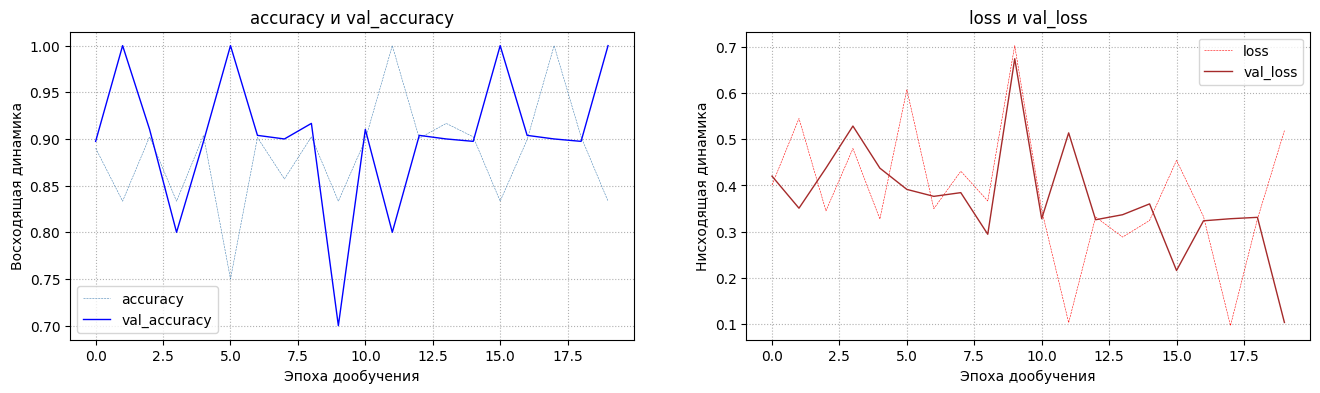

In [ ]:
import matplotlib.pyplot as plt

# Создаем фигуру с двумя наборами осей, расположенными в ряд
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Первый график: accuracy и val_accuracy
ax[0].plot(history.history['accuracy'], '--', color='steelblue', label='accuracy', linewidth=0.4)
ax[0].plot(history.history['val_accuracy'], color='blue', label='val_accuracy', linewidth=1)
ax[0].set_xlabel('Эпоха дообучения')
ax[0].set_ylabel('Восходящая динамика')
ax[0].set_title('accuracy и val_accuracy')
ax[0].legend()
ax[0].grid(linestyle=':')

# Второй график: loss и val_loss
ax[1].plot(history.history['loss'], '--', color='red', label='loss', linewidth=0.4)
ax[1].plot(history.history['val_loss'], color='brown', label='val_loss', linewidth=1)
ax[1].set_xlabel('Эпоха дообучения')
ax[1].set_ylabel('Нисходящая динамика')
ax[1].set_title('loss и val_loss')
ax[1].legend()
ax[1].grid(linestyle=':')

plt.show()

In [ ]:
# Создаем генератор тестовых данных и делаем предсказание на тестовой выборке
# ==============================================================================

from google.colab import output
output.no_vertical_scroll()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Параметры
img_width = 192
img_height = 270
batch_size = 12

# Путь к тестовой выборке
test_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/TEST'
test_labels_path = '/content/drive/MyDrive/NEIROSET_CNN/270x192/LABEL/test_labels.csv'

# Создание генератора тестовых данных
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

# Предсказание на тестовой выборке
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Загрузка меток тестовой выборки
test_labels = pd.read_csv(test_labels_path)
test_labels = test_labels['label'].values

# Получение имен классов
class_names = list(test_generator.class_indices.keys())

# Функция для отображения изображения с предсказанием
def show_image_with_prediction(image_path, true_label, predicted_label, probabilities):
    img = load_img(image_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}')
    plt.figtext(0.5, -0.1, f'Probabilities:\n{probabilities}', ha='center', fontsize=9)
    plt.show()

# Получение списка файлов изображений
image_files = test_generator.filenames

# Вывод нескольких случайных изображений с предсказаниями
num_images_to_show = 82
random_indices = np.random.choice(len(image_files), num_images_to_show, replace=False)

for idx in random_indices:
    image_path = os.path.join(test_path, image_files[idx])
    true_label = test_labels[idx]
    predicted_label = predicted_classes[idx]
    probabilities = predictions[idx]

    show_image_with_prediction(image_path, true_label, predicted_label, probabilities)

# Вывод общей точности
accuracy = accuracy_score(test_labels, predicted_classes)
print(f'Общая точность: {accuracy:.2f}')

# Вывод отчета о классификации
print('\nОтчет о классификации:')
print(classification_report(test_labels, predicted_classes, target_names=class_names))